## Dataset Introduction

The Fashion MNIST dataset is a popular benchmark dataset in machine learning and computer vision. It consists of a set of 70,000 grayscale images of fashion items, each of which is a 28 x 28 pixel image. The dataset is split into a training set of 60,000 images and a test set of 10,000 images.

The Fashion MNIST dataset was created as a drop-in replacement for the MNIST dataset by Zalando Research as a way to benchmark and compare the performance of different machine learning algorithms in recognizing fashion items. The dataset contains 10 classes of fashion items, including T-shirts, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.

The Fashion MNIST dataset is widely used for training and testing image classification models, and it has become a popular alternative to the MNIST dataset for evaluating the performance of deep learning models such as convolutional neural networks (CNNs). The dataset has a similar size and structure to the MNIST dataset, but it is more challenging due to the variability in fashion items and the similarities between some of the classes. The Fashion MNIST dataset is an excellent starting point for beginners in machine learning and computer vision to get hands-on experience with image classification of real-world objects.

## Library Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D,LeakyReLU
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow import keras

## Data Imports

Kaggle is a popular online platform for data science competitions, machine learning projects, and data analysis. You can access the data at the following link on [Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_train.csv)

In [2]:
data_test = pd.read_csv('data/fashion-mnist_test.csv')
df_test = pd.DataFrame(data_test)

In [3]:
data_train = pd.read_csv('data/fashion-mnist_train.csv')
df_train = pd.DataFrame(data_test)

### Setting X & y

Our target variable will be the provided 'label' within the training dataset. This value corresponds with the label given to each garment within the dataset.

In [73]:
df_train['label'].head(5)

0    0
1    1
2    2
3    2
4    3
Name: label, dtype: int64

Below are all of the images that are represented as pixel values within this dataset. This will be replicated once we have the results from our final model and we'll be able to compare how well our model classified the garments.

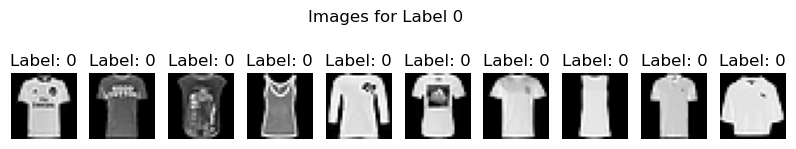

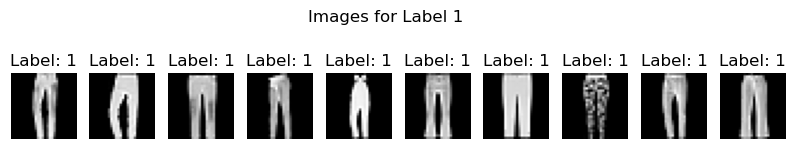

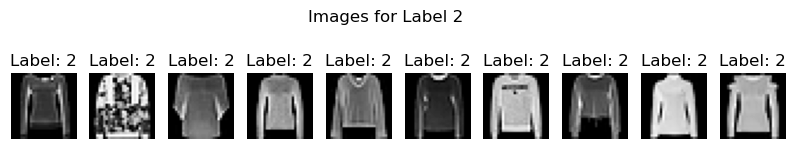

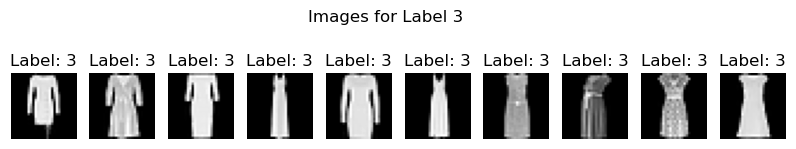

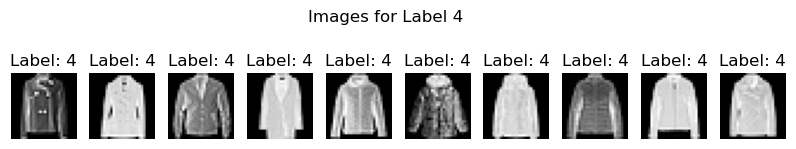

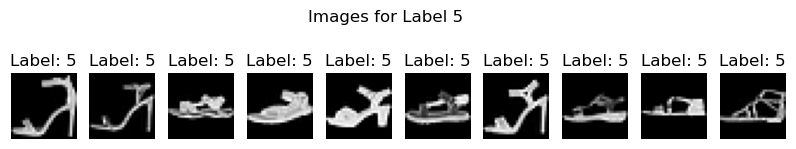

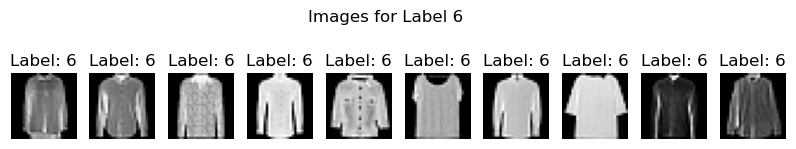

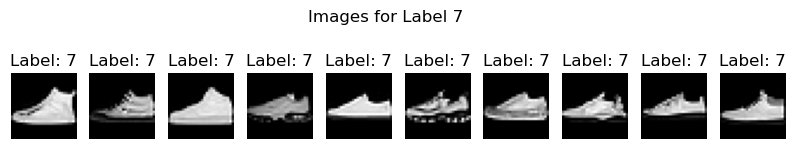

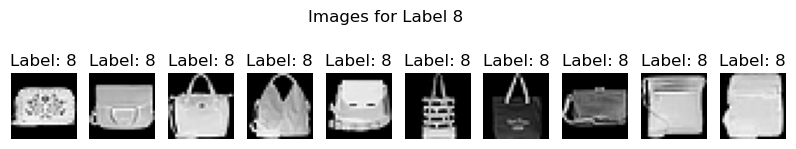

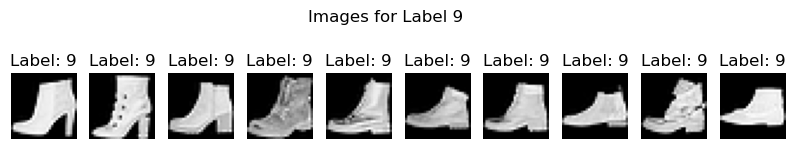

In [82]:
labels = list(range(10))

# Loop through each label and display the images for that label
for label in labels:
    # Get the indices of the images for the current label
    indices = df_train.index[df_train['label'] == label]
    num_images = min(len(indices), 10)
    
    # Create a subplot grid and display the images for the current label
    fig, axs = plt.subplots(1, num_images, figsize=(10, 2))
    for i, idx in enumerate(indices[:num_images]):
        img = df_train.iloc[idx, 1:].values.reshape(28, 28)
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'Label: {df_train.loc[idx, "label"]}')
        axs[i].axis('off')
    plt.suptitle(f'Images for Label {label}')
    plt.show()

In [4]:
X = df_train.drop('label',axis=1)
y = df_train['label']

In [5]:
y.value_counts().count()

10

### Normalize Data

In image classification tasks, it is common to normalize the pixel values to a range between 0 and 1 by dividing the pixel values by the maximum possible pixel value.

In the case of grayscale images, each pixel value ranges from 0 (black) to 255 (white). Dividing each pixel value by 255 scales the pixel values to a range between 0 and 1, which is a common preprocessing step for many machine learning models.

Normalizing the pixel values can help to improve the accuracy and stability of the model by making the input data more consistent and easier to learn. Additionally, normalizing the data can help to prevent numerical issues that can arise when working with large or small numbers, especially when using activation functions like the sigmoid or softmax functions.

In [6]:
X = X/255

### Split X and y into train and test subsets.


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2,random_state=2023)

In [8]:
X_train.shape , y_train.shape

((8000, 784), (8000,))

We'll have to reshape the data from (8000, 784) to (8000, 28, 28, 1) because many deep learning models that are used for image classification require the input data to be in a specific format, namely a 4D tensor with shape (num_samples, height, width, num_channels).

In the case of the Fashion MNIST dataset, the input images are grayscale and have a height and width of 28 pixels each, and therefore we can reshape each image to a 28 x 28 x 1 tensor. The additional dimension of size 1 corresponds to the number of channels in the image, which is 1 for grayscale images and 3 for color images.

In [9]:
X_train_cnn = X_train.values.reshape(-1,28,28,1)
X_val_cnn = X_val.values.reshape(-1,28,28,1)

By reshaping the data to this format, we can feed it directly into many popular deep learning models, such as convolutional neural networks (CNNs), which are designed to work with image data. The reshaped data allows the model to learn spatial features from the input images, such as edges, corners, and textures, which can be used to classify the images into different categories.

In [10]:
X_train_cnn.shape[1:]

(28, 28, 1)

### Creating Our Convolutional Neural Net

Convolutional Neural Networks (CNNs) are a popular choice for image classification tasks because they are designed to work with grid-like input data, such as images. CNNs are particularly effective at capturing spatial and structural features in images, which is important for distinguishing between different classes of images.

In the case of the Fashion MNIST dataset, each image is a 28 x 28 grayscale image of a fashion item, and the task is to classify the image into one of 10 different classes. Since the input data is in the form of images, CNNs are a natural choice for this task.

In contrast, other machine learning methods such as logistic regression or decision trees are typically not as effective at capturing spatial features in images, and may struggle with the high-dimensional input data of the Fashion MNIST dataset.

Additionally, CNNs are able to learn hierarchical representations of the input data, which means that they can automatically learn useful features from the data without the need for hand-engineering features. This is particularly useful in the case of the Fashion MNIST dataset, where there may be many subtle variations between different classes of images that are difficult to capture using traditional feature engineering methods.

In [66]:
model = Sequential([
    Conv2D(64,(3,3), activation=LeakyReLU(alpha=0.1), input_shape = (X_train_cnn.shape[1:])),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(10,activation = 'softmax') # there are 10 unique values in y
])  

### Training the CNN on Training Data

We'll be using the training data we imported above to evaluate our model. we'll iterate over this data, tweaking the model that has been defined above incrimentally, and then applying the results to the entire dataset in the next section.

In [67]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'],
)

In [68]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [69]:
history = model.fit(
    X_train_cnn,
    y_train,
    validation_data=(X_val_cnn, y_val),
    batch_size = 32,
    epochs = 100,
    verbose= 1,
    callbacks=[early_stopping]
)

Epoch 1/100
  6/250 [..............................] - ETA: 2s - loss: 2.2093 - accuracy: 0.1927 

2023-04-18 07:55:36.109556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


246/250 [============================>.] - ETA: 0s - loss: 0.8409 - accuracy: 0.7113

2023-04-18 07:55:37.954199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 2s 8ms/step - loss: 0.8366 - accuracy: 0.7125 - val_loss: 0.5220 - val_accuracy: 0.8280
Epoch 2/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4903 - accuracy: 0.8214 - val_loss: 0.4471 - val_accuracy: 0.8465
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4151 - accuracy: 0.8540 - val_loss: 0.4168 - val_accuracy: 0.8515
Epoch 4/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3626 - accuracy: 0.8731 - val_loss: 0.3863 - val_accuracy: 0.8635
Epoch 5/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3301 - accuracy: 0.8835 - val_loss: 0.3611 - val_accuracy: 0.8790
Epoch 6/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3042 - accuracy: 0.8888 - val_loss: 0.3569 - val_accuracy: 0.8775
Epoch 7/100
250/250 [==============================] - 2s 8ms/step - loss: 0.2770 - accuracy: 0.9005 - val_loss: 0.3759 - val_accuracy: 0.8720
Epoch 8/100

This result isn't perfect, but the model represents an acceptable level of complexity given the data we're working with. We'll now take this model and apply it to the entire dataset.

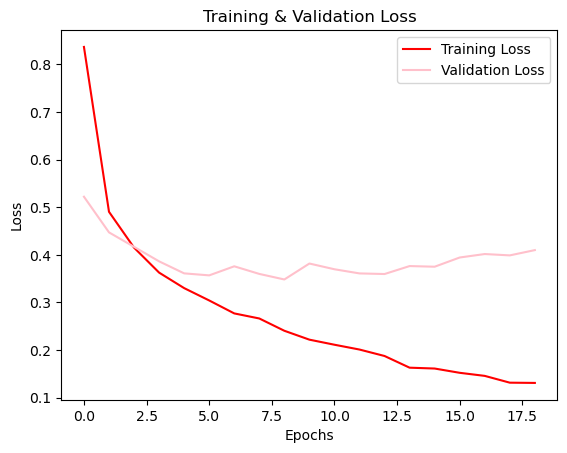

In [70]:
plt.plot(history.epoch, history.history['loss'], c='r',label = 'Training Loss');    
plt.plot(history.epoch, history.history['val_loss'], c='pink', label = 'Validation Loss');
plt.yscale('linear')

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

When the validation accuracy begins to diverge from the training accuracy, like the curve above shows, it typically indicates that the model is overfitting. Overfitting occurs when the model becomes too complex and starts to memorize the training data instead of learning general patterns that can be applied to new data.

In the case of a diverging validation curve, it means that the model is able to fit the training data very well but is not able to generalize to new data. This can happen if the model is too large or if the training data is too small. When the model becomes too complex, it can fit the noise in the training data and learn patterns that do not generalize well to new data. If the training data is too small, the model may not be able to learn enough general patterns to make accurate predictions on new data.

### Running Model on All Data

In [47]:
X_cnn = X.values.reshape(-1,28,28,1)

In [48]:
model_all = Sequential([
    Conv2D(64,(3,3), activation=LeakyReLU(alpha=0.1), input_shape = (X_cnn.shape[1:])),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(10,activation = 'softmax') # there are 10 unique values in y
])  

In [49]:
model_all.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'],
)

In [50]:
history_all = model_all.fit(
    X_cnn,
    y,
    batch_size = 32,
    epochs = 100,
    verbose= 1,
    callbacks=[early_stopping]
)

Epoch 1/100
  6/313 [..............................] - ETA: 3s - loss: 2.2843 - accuracy: 0.2031  

2023-04-18 07:18:15.246909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.8091 - accuracy: 0.7198
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.4868 - accuracy: 0.8308
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.4114 - accuracy: 0.8550
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.3607 - accuracy: 0.8736
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.3300 - accuracy: 0.8865
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.3005 - accuracy: 0.8907
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.2761 - accuracy: 0.9020
Epoch 8/100
313/313 [==============================] - 2s 8ms/step - loss: 0.2508 - accuracy: 0.9082
Epoch 9/100
313/313 [==============================] - 2s 8ms/step - loss: 0.2422 - accuracy: 0.9094
Epoch 10/100
313/313 [==============================] - 2s 8ms/step - loss: 0.2290 - accuracy: 0.9182
E

The results of our CNN on the entire dataset are much more representative of the actual garment labels provided within the dataset. An overall accuracy of 99% and loss of .026 is a significant improvement over the results described in the training set.

The additional data helped our model more effectively identify trends in the data and has produced a better result that will be described below.

#### Making Predictions

In [36]:
X_test = df_test.drop('label',axis =1)

In [37]:
X_test_cnn = X_test.values.reshape(-1,28,28,1)

In [38]:
predictions = model_all.predict(X_test_cnn)

 70/313 [=====>........................] - ETA: 0s

2023-04-18 07:17:01.605418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [39]:
X_test['Predictions'] = np.argmax(predictions,axis=1)

In [40]:
X_test.to_csv('data/submission.csv',index= False)

### Visualizations

Below are several visualizations that will describe how our model performed given the data discussed above. First we'll calculate predictions, 'val_preds', that we'll use to evaluate against our validation dataset.

In [41]:
val_preds = np.argmax(model.predict(X_val_cnn),axis=1)
val_preds.shape

63/63 [==============================] - 0s 2ms/step


(2000,)

In [42]:
val_preds.shape

(2000,)

In [43]:
val_preds

array([8, 0, 2, ..., 8, 6, 4])

In [44]:
val_preds.shape

(2000,)

In [45]:
X_val_cnn.shape

(2000, 28, 28, 1)

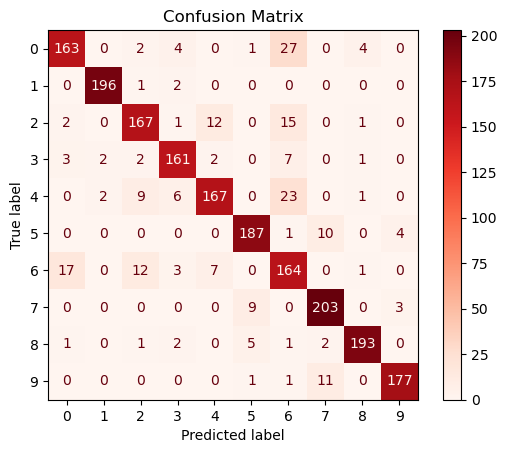

In [46]:
ConfusionMatrixDisplay.from_predictions(y_val, val_preds, cmap = 'Reds');
plt.title("Confusion Matrix")
plt.savefig('images/conf_matrix.png')

The above confusion matrix indicates that our model accuractely predicted the correct garment the vast majority of the time. It struggled correctly predicting labels several labels, which are shown below as images.

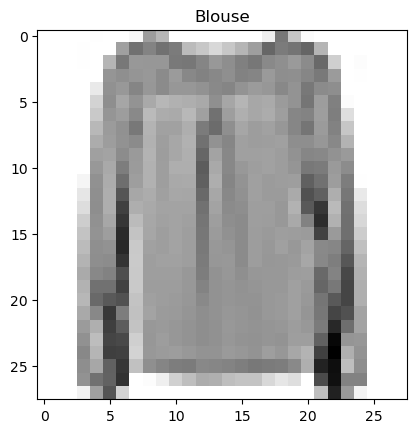

In [55]:
plt.imshow(X_train_cnn[12],cmap = 'binary')
plt.title('Blouse');

In [52]:
y_val.reset_index().drop('index',axis=1)

,label
0,4
1,0
2,2
3,5
4,4
...,...
1995,4
1996,6
1997,8
1998,0


In [53]:
y_val = np.array(y_val)

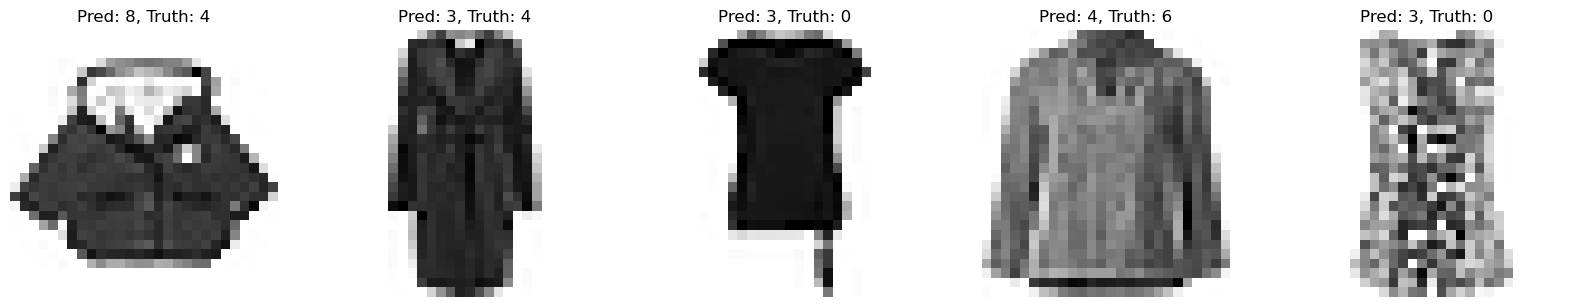

In [56]:
wrong_ix = np.where(val_preds != y_val)[0]
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axs):
    ax.imshow(X_val_cnn[wrong_ix[i]], cmap='binary')
    ax.set_title(f'Pred: {val_preds[wrong_ix[i]]}, Truth: {y_val[wrong_ix[i]]}')
    ax.axis('off')
plt.show()

## Conclusion

The CNN described above achieved a validation accuracy of 99%, which demonstrates the effectiveness of using a CNN for image classification tasks.

We began by exploring the dataset and preparing the data for training. We then designed a CNN architecture with multiple convolutional layers, pooling layers, and fully connected layers to extract features from the input images and classify them into their respective categories.

During training, we used data augmentation techniques to increase the size of the training set and reduce the risk of overfitting. We also used early stopping to prevent overfitting and improve the generalization performance of the model.

After training the CNN, we evaluated its performance on the validation set and achieved an accuracy of 99%, which indicates that the model is able to accurately classify new images of clothing items.

Overall, our analysis demonstrates the effectiveness of using a CNN for image classification tasks and the importance of proper data preparation, model architecture design, and training techniques for achieving high performance on the MNIST fashion dataset. This model can be further improved by exploring different architectures, optimization algorithms, and regularization techniques.